In [1]:
# let us install kaggle library
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# This block is used for uploading the api key associated with my account
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 74 bytes


In [3]:
# This block shows some of the datasets
# it is just proving that the api key worked
!kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/world-population-dataset                     World Population Dataset                             17KB  2022-08-31 11:20:04          13191        377  1.0              
narayan63/netflix-popular-movies-dataset                       Netflix popular movies dataset                        1MB  2022-09-24 08:23:22           1293         33  0.9411765        
anushabellam/trending-videos-on-youtube                        Trending videos on Youtube                           29KB  2022-09-20 12:12:35            984         32  1.0              
whenamancodes/student-performance                              St

In [ ]:
# Download the dataset you need
# !kaggle kernels output testpython/linear-regression-with-single-variable -p /content/
# Here, the files were manually downloaded as there were two files, train.csv and test.csv
# Download from https://www.kaggle.com/code/testpython/linear-regression-with-single-variable/data

In [ ]:
# Mount with google drive if necessary
from google.colab import drive
drive.mount('/content/drive')

In [4]:
import pandas as pd

In [5]:
# reading the train data
df_train = pd.read_csv('/train.csv')
df_train

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [6]:
# Check if any null values exists in train data
df_train.isnull().sum()

x    0
y    1
dtype: int64

In [7]:
# as null value exists, we fill it with the median value
df_train['y']=df_train['y'].fillna(df_train['y'].mean())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


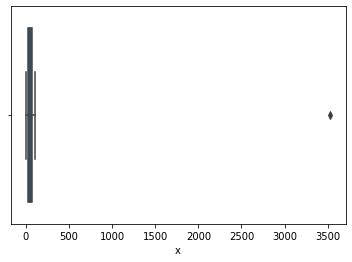

In [8]:
# For detecting outliers
import seaborn as sns
sns.boxplot(df_train['x']) 

In [9]:
# an outlier is detected at x=3500, so we delete that row
#df_train.drop(df_train.index[df_train['x'] > 500])
df_train = df_train[df_train.x < 500]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


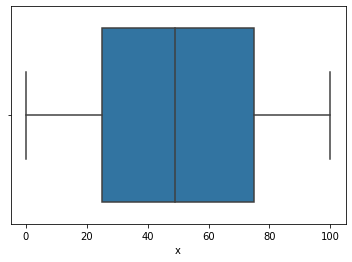

In [10]:
# recheck outliers 
sns.boxplot(df_train['x']) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


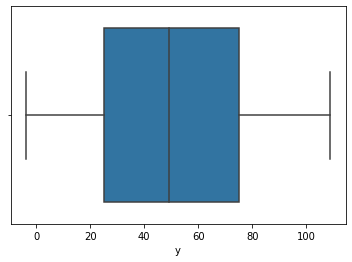

In [11]:
# For detecting outliers
import seaborn as sns
sns.boxplot(df_train['y']) 

In [12]:
# reading the test data
df_test = pd.read_csv('/test.csv')
df_test

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


In [13]:
# Check if any null values exists in train data
df_test.isnull().sum()

x    0
y    0
dtype: int64

In [ ]:
# No null values exist in test data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


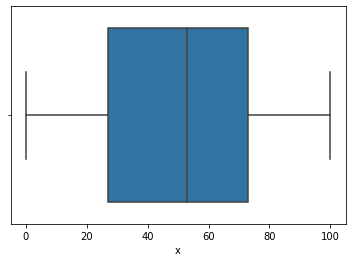

In [14]:
# For detecting outliers
import seaborn as sns
sns.boxplot(df_test['x']) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


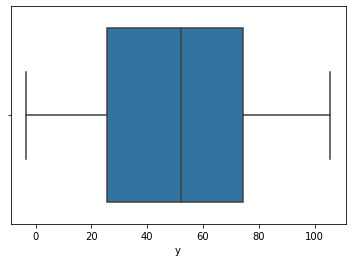

In [15]:
# For detecting outliers
import seaborn as sns
sns.boxplot(df_test['y']) 

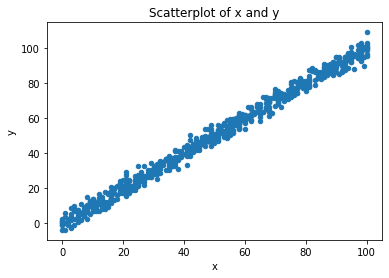

In [16]:
# Now plot a graph of regression
df_train.plot.scatter(x='x',y='y',title='Scatterplot of x and y')

In [17]:
y = df_train['y']
x = df_train['x']

In [22]:
# check if the variables are in matrix form
print(x.shape)
print(y.shape)

(699,)
(699,)


In [23]:
# they are not, so we reshape them to a matrix form
x=x.values.reshape(-1, 1)
y=y.values.reshape(-1, 1)

In [24]:
# recheck if the variables are in matrix form
print(x.shape)
print(y.shape)

(699, 1)
(699, 1)


In [25]:
# Carrying out polynomial regression

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

In [62]:
poly_features = poly.fit_transform(x)

In [63]:
poly_features

array([[  24.,  576.],
       [  50., 2500.],
       [  15.,  225.],
       ...,
       [  82., 6724.],
       [  66., 4356.],
       [  97., 9409.]])

In [64]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [48]:
poly_reg_model = LinearRegression()

In [65]:
# Training the model
poly_reg_model.fit(poly_features, y)

LinearRegression()

In [67]:
# Taking the test data
x_test=df_test['x']
y_test=df_test['y']

In [68]:
# check if the variables are in matrix form
print(x_test.shape)
print(y_test.shape)

(300,)
(300,)


In [69]:
# they are not, so we reshape them to a matrix form
x_test=x_test.values.reshape(-1, 1)
y_test=y_test.values.reshape(-1, 1)

In [70]:
# recheck if the variables are in matrix form
print(x_test.shape)
print(y_test.shape)

(300, 1)
(300, 1)


In [ ]:
# making the test data fit for polynomial regression
poly_test_features = poly.fit_transform(x_test)
#print(poly_test_features)

In [73]:
# predicting values for test data
y_predicted = poly_reg_model.predict(poly_test_features)

In [78]:
y_predicted.shape

(300, 1)

In [80]:
y_test.shape

(300, 1)

In [76]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [81]:
# error calculation
mae=mean_absolute_error(y_test,y_predicted)  # mean absolute error
mse=mean_squared_error(y_test,y_predicted)  # mean squared error
rmse=np.sqrt(mse) #  root mean square error

In [82]:
print(mae)
print(mse)
print(rmse)

2.4215966178776256
9.46364451510909
3.076303709829231
